In [7]:
### Encoding categorical variables
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


ca_df = pd.read_csv("marketing_customer_analysis_clean.csv")

In [8]:
ca_df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [9]:
ca_df = ca_df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [10]:
ca_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [33]:
categoricals = ca_df.select_dtypes(include=object)
numericals = ca_df.select_dtypes(include = np.number)

In [38]:
ca_df["education"].unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [39]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High School or Below", "College", "Bachelor","Master", "Doctor"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Small","Medsize","Large"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

<ipython-input-41-c2d63f1cbcc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])
<ipython-input-41-c2d63f1cbcc5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["education"] = enc.fit_transform(ordinals[["education"]])
<ipython-input-41-c2d63f1cbcc5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [42]:
ordinals

,coverage,education,vehicle_size
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,1.0,1.0,1.0
4,2.0,2.0,1.0
...,...,...,...
10905,2.0,2.0,1.0
10906,0.0,1.0,1.0
10907,1.0,2.0,1.0
10908,2.0,1.0,1.0


In [43]:
nominals = pd.get_dummies(nominals)

In [44]:
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


### Numericals

In [48]:
numericals = ca_df.select_dtypes(include='number')
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [49]:
#dropping nas
ca_df = numericals.dropna()

In [51]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [50]:
#dropping duplicates
ca_df = numericals.drop_duplicates()

In [52]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

### CONCAT

In [53]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [57]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'polic

### Lab instructions : 

1) Compute R2 for the first model iteration + feature importance plot
2) Run the 2nd iteration of the model, adding the categorical data

### X-y Split

In [58]:
X = final_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer1',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A']]
y = final_df[["total_claim_amount"]]

### Train test split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [61]:
#Standardize the data (after the data split!).

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

scaler = MinMaxScaler()

scaler.fit(X_train)
scaler.transform(X_train)

array([[0.24954704, 0.37560136, 0.53164557, ..., 0.        , 0.        ,
        0.        ],
       [0.07813874, 0.33327332, 0.18565401, ..., 0.        , 0.        ,
        0.        ],
       [0.00456644, 0.        , 0.02953586, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07310297, 0.        , 0.03375527, ..., 0.        , 0.        ,
        0.        ],
       [0.03777879, 0.        , 0.03797468, ..., 0.        , 0.        ,
        0.        ],
       [0.44404234, 0.        , 0.2278481 , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
scaler.transform(X_test)

array([[0.04783588, 0.95751193, 0.0464135 , ..., 0.        , 1.        ,
        0.        ],
       [0.01202724, 0.32813235, 0.05063291, ..., 0.        , 0.        ,
        0.        ],
       [0.0032382 , 0.        , 0.02531646, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01650036, 0.8921295 , 0.08438819, ..., 0.        , 0.        ,
        0.        ],
       [0.07625516, 0.        , 0.06329114, ..., 0.        , 1.        ,
        0.        ],
       [0.03994245, 0.65641472, 0.01265823, ..., 0.        , 0.        ,
        0.        ]])

### Model Training

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [65]:
model.coef_

array([[-1.70047852e-04, -2.80537314e-04,  5.26604851e+00,
         3.76241371e-01, -1.46345103e-02, -1.29084562e+00,
         1.01020141e+00, -7.84612776e-01, -8.61876594e+00,
        -4.88828131e+00, -1.25119052e-01, -4.34926287e+00,
         9.39022508e-01,  2.98794993e+00, -4.93830639e+00,
         5.36059682e+00,  1.20945036e+01, -1.20945036e+01,
        -7.23171454e+00, -1.76094343e+01, -3.11046615e+00,
        -2.18670404e+01,  4.98186554e+01, -8.47831697e+00,
         8.47831697e+00, -2.03048434e+02,  1.80897949e+02,
         2.21504848e+01, -2.06814640e+01, -2.42016663e+01,
         4.48831303e+01, -6.56535082e+00, -4.25400803e+00,
         1.08193588e+01, -7.36921956e+00,  8.71510732e-01,
        -6.76419885e-02,  2.31636225e+00, -3.83124787e+00,
        -2.73912242e+00,  2.82510679e+01, -7.77750289e+00,
        -9.65420618e+00, -7.85992414e+00,  8.38833058e+00,
         4.11997505e+00, -4.64838149e+00,  6.02024769e-01,
        -1.42275216e+00, -3.06184780e-01,  1.12691217e+0

In [66]:
model.intercept_

array([-116.88683217])

### Predict total claim amount

In [67]:
random_claim = X_test.sample()

In [68]:
random_claim

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,coverage,education,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
1408,4334.064096,23904,123,1.0,67,3.0,1,2,1.0,2.0,...,0,0,0,0,0,0,1,0,0,1


In [69]:
model.predict(random_claim)

array([[658.66805078]])

In [70]:
### Create predictions for test set

In [71]:
y_pred = model.predict(X_test)

In [72]:
y_pred = pd.DataFrame(y_pred)

In [73]:
y_test = y_test.reset_index(drop=True)

In [74]:
residuals_df = pd.concat([y_test,y_pred],axis=1)

In [75]:
residuals_df = residuals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})

In [76]:
residuals_df

,y_test,y_pred
0,475.423848,379.509652
1,350.400000,428.341897
2,482.400000,548.803042
3,673.342650,579.137733
4,302.400000,320.777754
...,...,...
2723,460.266881,551.225553
2724,405.883346,411.954112
2725,41.182611,19.852542
2726,364.800000,493.808536


In [77]:
residuals_df["residuals"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [78]:
residuals_df

,y_test,y_pred,residuals
0,475.423848,379.509652,95.914196
1,350.400000,428.341897,-77.941897
2,482.400000,548.803042,-66.403042
3,673.342650,579.137733,94.204917
4,302.400000,320.777754,-18.377754
...,...,...,...
2723,460.266881,551.225553,-90.958672
2724,405.883346,411.954112,-6.070766
2725,41.182611,19.852542,21.330069
2726,364.800000,493.808536,-129.008536


In [79]:
residuals_df["residuals"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [80]:
residuals_df.head()

,y_test,y_pred,residuals
0,475.423848,379.509652,95.914196
1,350.400000,428.341897,-77.941897
2,482.400000,548.803042,-66.403042
3,673.342650,579.137733,94.204917
4,302.400000,320.777754,-18.377754


### Calculating metrics

In [81]:
mean_error = residuals_df["residuals"].mean()

In [82]:
mean_error

3.044246039562758

In [83]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [84]:
mse(y_test,y_pred)

19206.476983995482

In [85]:
mae(y_test,y_pred)

95.78143500493694

In [86]:
rmse = mse(y_test,y_pred, squared = False)
rmse

138.58743443759786

In [87]:
from sklearn.metrics import r2_score

### Computing R2_score for test_set

In [88]:
round(r2_score(y_test, y_pred),2)

0.77

### Computing R2_score_for_train_set

In [89]:
y_pred_train = pd.DataFrame(model.predict(X_train))

In [90]:
r2_score(y_train,y_pred_train)

0.7702689480251463

In [91]:
feature_names = list(X_train.columns)

In [92]:
coefficients = model.coef_

In [93]:
coefficients = [i for i in coefficients[0]]

In [94]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,customer_lifetime_value,-0.000170
1,income,-0.000281
2,monthly_premium_auto,5.266049
3,months_since_last_claim,0.376241
4,months_since_policy_inception,-0.014635
5,number_of_open_complaints,-1.290846
6,number_of_policies,1.010201
7,month,-0.784613
8,coverage,-8.618766
9,education,-4.888281


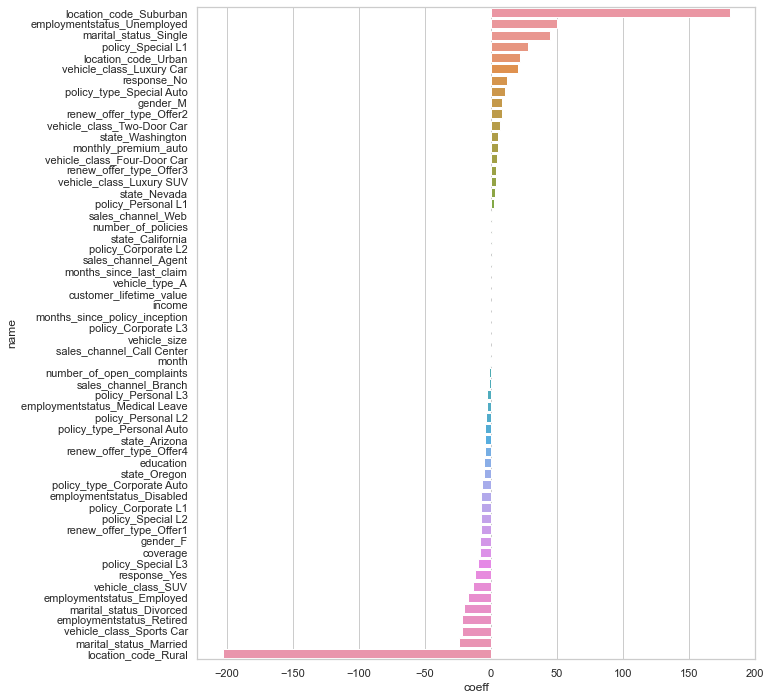

In [96]:
import seaborn as sns
fi_df_sorted = fi_df.sort_values(by = "coeff", ascending = False)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.barplot(y = fi_df_sorted["name"], x = fi_df_sorted["coeff"])

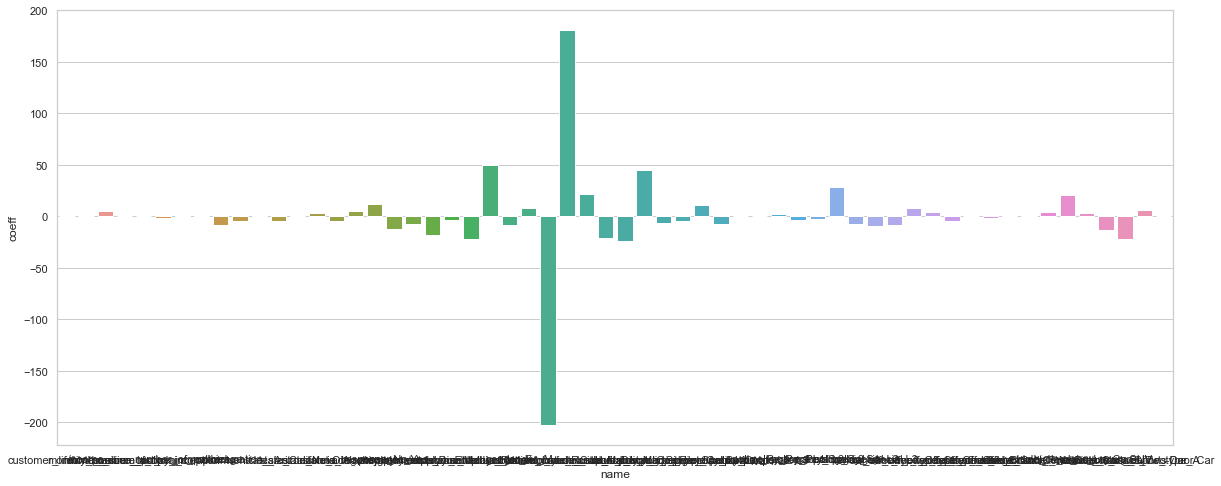

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

sns.barplot(x = fi_df["name"],y =fi_df["coeff"])

In [97]:
X_train["location_code_Suburban"].describe()

count    8182.000000
mean        0.629553
std         0.482954
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: location_code_Suburban, dtype: float64